# **Developing the Program**

Import Libraries


In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt #Display images
import numpy as np #Manipulate Arrays
import cv2
from google.colab.patches import cv2_imshow

Read Image

In [ ]:
image = cv2.imread("cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Show Image

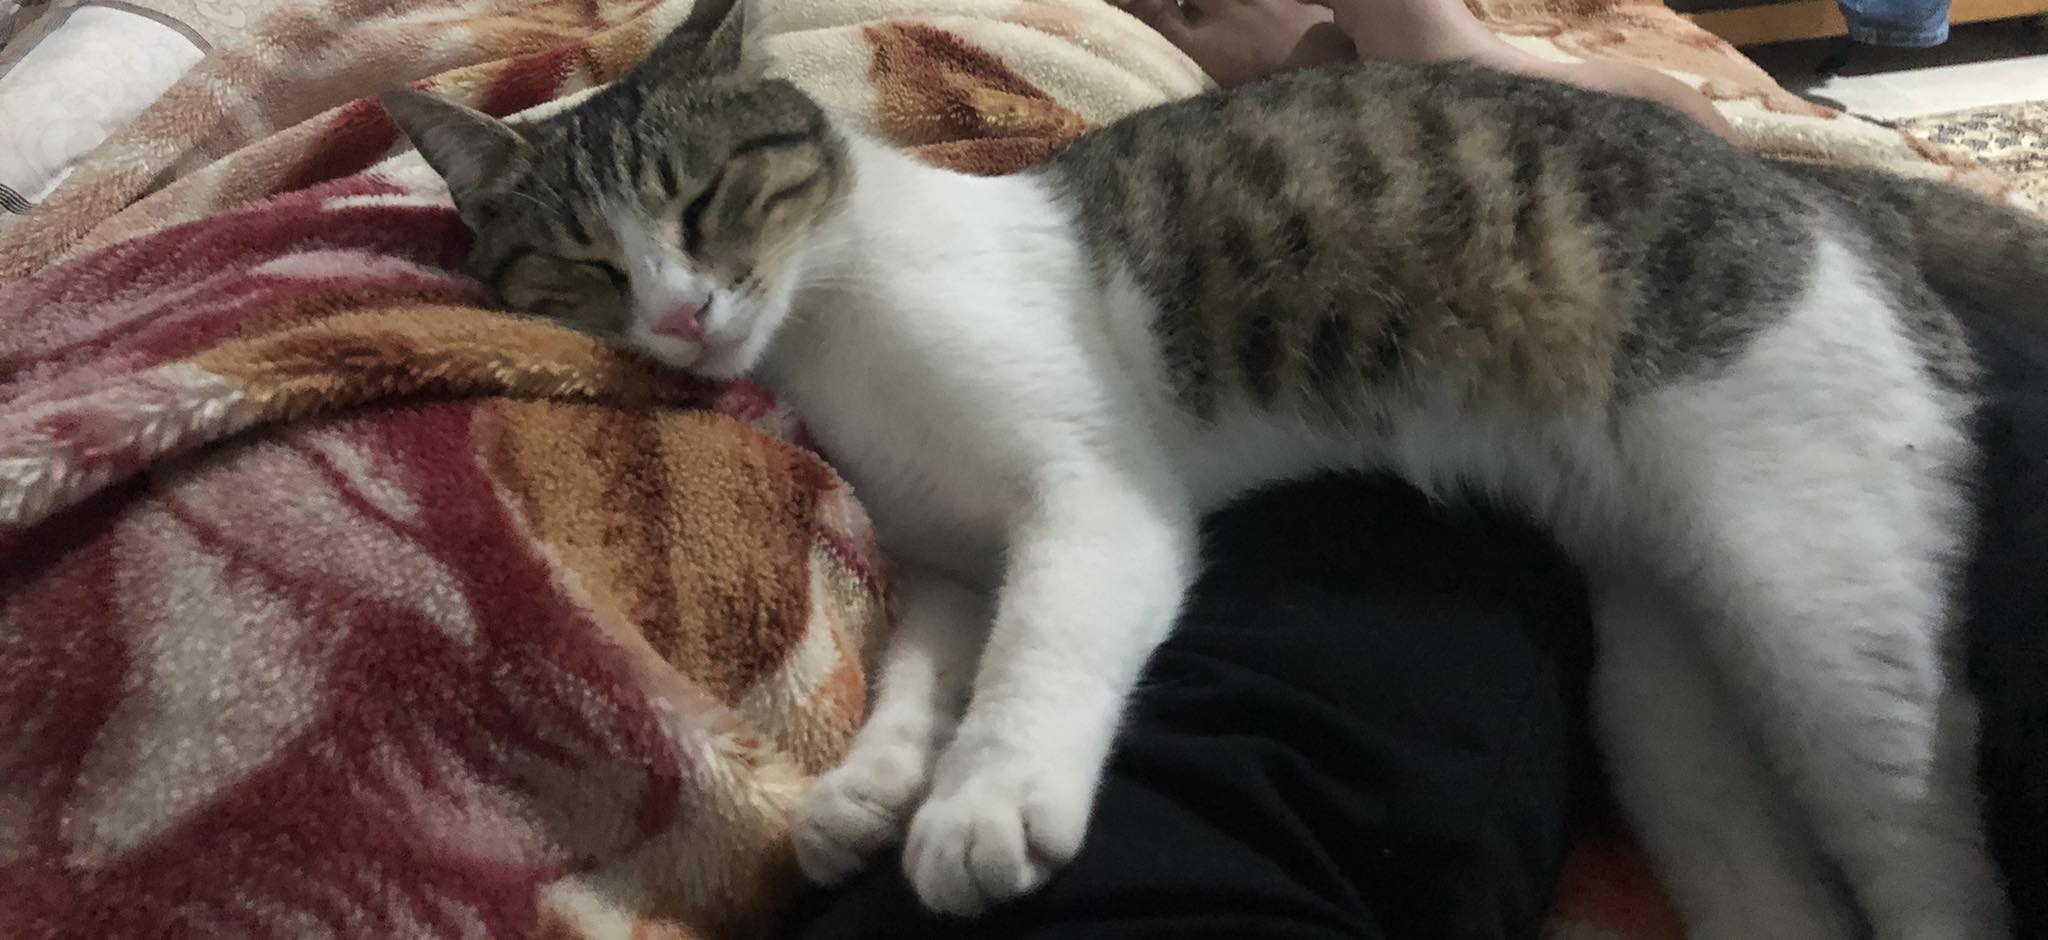

In [ ]:
cv2_imshow(image)

See Image Shape

In [ ]:
image.shape

(940, 2048, 3)

See the color values of the image

In [ ]:
print(image[0][0])

[130 132 143]


Load message

In [ ]:
message = "hey bro"

Convert message to Ascii

In [ ]:
messageToAscii = []

for letter in message:
  messageToAscii.extend(ord(num) for num in letter)

#https://www.geeksforgeeks.org/python-convert-string-list-to-ascii-values/

See the ascii values of the message

In [ ]:
messageToAscii

[104, 101, 121, 32, 98, 114, 111]

Function to convert an Integer to a Binary Number List

In [ ]:
def IntegerToBinaryList(x,s):
    return [(x>>k)&1 for k in range(0,s)][::-1]

Convert Entire Message to a List of Binary Lists

In [ ]:
messageToAsciiBinary = []

for num in messageToAscii:
  messageToAsciiBinary.append(IntegerToBinaryList(num,8))

#https://stackoverflow.com/questions/13522773/convert-an-integer-to-binary-without-using-the-built-in-bin-function

Another method of converting the message to a List of Binary Lists (Strings though)


In [ ]:
def IntegerToBinaryString(number):
    return '{0:08b}'.format(number)

Convert Entire message to a list of Binary Strings

In [ ]:
messageToAsciiBinary = []

for num in messageToAscii:
  messageToAsciiBinary.append(IntegerToBinaryString(num))

#https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python

See the Ascii Binary Values

In [ ]:
messageToAsciiBinary

['01101000',
 '01100101',
 '01111001',
 '00100000',
 '01100010',
 '01110010',
 '01101111']

In [ ]:
type(messageToAsciiBinary[0])

Function to convert from a Binary List back to an Integer

In [ ]:
def BinaryListToInteger(BinaryList):
  out = 0
  for bit in BinaryList:
    out = (out << 1) | bit

  return out

#https://stackoverflow.com/questions/12461361/bits-list-to-integer-in-python

Another function that converts Binary String to in integer

In [ ]:
def BinaryStringToInteger(BinaryString):
  return int(BinaryString, 2)


Convert the Entire List back to Integer

In [ ]:
BackToInteger = []
for BinaryNumber in messageToAsciiBinary:
  BackToInteger.append(BinaryStringToInteger(BinaryNumber))

In [ ]:
BackToInteger

[104, 101, 121, 32, 98, 114, 111]

Reshape the List of Binary Lists to have a single list of binary values

In [ ]:
messageToAsciiBinarySingleList = np.reshape(messageToAsciiBinary,(-1))

In [ ]:
messageToAsciiBinarySingleList

array(['01101000', '01100101', '01111001', '00100000', '01100010',
       '01110010', '01101111'], dtype='<U8')

Reshaping Binary String Lists to have single list of binary values

In [ ]:
messageToAsciiBinarySingleList = "".join(messageToAsciiBinary)

In [ ]:
messageToAsciiBinarySingleList

'01101000011001010111100100100000011000100111001001101111'

Convert Cover image color values to binary

In [ ]:
CoverImageBinary = []

for row in range(len(image)):
  BinaryRow = []

  for column in range(len(image[row])):
    BinaryColumn = []

    for color in range(len(image[row][column])):
      # BinaryColor = IntegerToBinaryList(image[row][column][color],8)

       BinaryColor = IntegerToBinaryString(image[row][column][color])
       BinaryColumn.append(BinaryColor)

    BinaryRow.append(BinaryColumn)
  CoverImageBinary.append(BinaryRow)



In [ ]:
print(CoverImageBinary[0][0])

In [ ]:
np.shape(CoverImageBinary)

Convert Color Value from Binary list to an Integer

In [ ]:
CoverImageBackToInteger = []

for row in range(len(CoverImageBinary)):
  IntegerRow = []

  for column in range(len(CoverImageBinary[row])):
    IntegerColumn = []

    for color in range(len(CoverImageBinary[row][column])):
        #IntegerColor = BinaryListToInteger(CoverImageBinary[row][column][color])

        IntegerColor = BinaryStringToInteger(CoverImageBinary[row][column][color])
        IntegerColumn.append(IntegerColor)

    IntegerRow.append(IntegerColumn)
  CoverImageBackToInteger.append(IntegerRow)

In [ ]:
np.shape(CoverImageBackToInteger)

In [ ]:
print(CoverImageBackToInteger[0][0])

Encode message in the pixels

In [ ]:

i=0

for row in range(len(CoverImageBinary)):
  for column in range(len(CoverImageBinary[row])):
    for color in range(len(CoverImageBinary[row][column])):
      if(i==len(messageToAsciiBinarySingleList)):
        break
      if(CoverImageBinary[row][column][color][-1]!=messageToAsciiBinarySingleList[i]):
          #CoverImageBinary[row][column][color][-1] = messageToAsciiBinarySingleList[i]#For Binary Lists
          CoverImageBinary[row][column][color] = CoverImageBinary[row][column][color][0:-1]+messageToAsciiBinarySingleList[i]
      i+=1
  else:
    continue

#https://stackoverflow.com/questions/653509/breaking-out-of-nested-loops

In [ ]:
len(messageToAsciiBinarySingleList)

56

convert the image back to integer list

In [ ]:
CoverImageBackToInteger = []

for row in range(len(CoverImageBinary)):
  IntegerRow = []

  for column in range(len(CoverImageBinary[row])):
    IntegerColumn = []

    for color in range(len(CoverImageBinary[row][column])):
        IntegerColor = BinaryStringToInteger(CoverImageBinary[row][column][color])
        IntegerColumn.append(IntegerColor)

    IntegerRow.append(IntegerColumn)
  CoverImageBackToInteger.append(IntegerRow)

convert image to numpy array

In [ ]:
CoverImageNumpy = np.array(CoverImageBackToInteger)

Save the image into a new image

In [ ]:
from PIL import Image


im = Image.fromarray(CoverImageNumpy.astype('uint8')).convert('RGB')

im.save("HiddenMessageImage.png")

**Decode the image**

Extract the message from the image

In [ ]:
HiddenMessageBinary = []

HiddenMessageLength =56
i=0
for row in range(len(CoverImageBinary)):
  for column in range(len(CoverImageBinary[row])):
    for color in range(len(CoverImageBinary[row][column])):
      if(i==HiddenMessageLength):
        break
      HiddenMessageBinary.append(CoverImageBinary[row][column][color][-1])
      i+=1
  else:
    continue

In [ ]:
HiddenMessageBinary

['0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1']

Reshape for binary string

In [ ]:
HiddenMessageBinary = "".join(HiddenMessageBinary)

In [ ]:
HiddenMessageBinary

'01101000011001010111100100100000011000100111001001101111'

Convert Binary to BinaryLists

In [ ]:
len(HiddenMessageBinary)

In [ ]:
HiddenMessageBinaryList = []
BinaryList = []

i=0
for bit in HiddenMessageBinary:

  BinaryList.append(bit)
  i+=1

  if i>7:
    HiddenMessageBinaryList.append(BinaryList)
    BinaryList = []
    i=0



In [ ]:
len(HiddenMessageBinaryList)

In [ ]:
HiddenMessageBinaryList

[['0', '1', '1', '0', '1', '0', '0', '0'],
 ['0', '1', '1', '0', '0', '1', '0', '1'],
 ['0', '1', '1', '1', '1', '0', '0', '1'],
 ['0', '0', '1', '0', '0', '0', '0', '0'],
 ['0', '1', '1', '0', '0', '0', '1', '0'],
 ['0', '1', '1', '1', '0', '0', '1', '0'],
 ['0', '1', '1', '0', '1', '1', '1', '1']]

Convert Binary to a Binary List String

In [ ]:
HiddenMessageBinaryList = []
BinaryString = ""

i=0
for bit in HiddenMessageBinary:

  BinaryString+=bit
  i+=1

  if i>7:
    HiddenMessageBinaryList.append(BinaryString)
    BinaryString = ""
    i=0


In [ ]:
HiddenMessageBinaryList

['01101000',
 '01100101',
 '01111001',
 '00100000',
 '01100010',
 '01110010',
 '01101111']

Convert Binary values to ascii

In [ ]:
HiddenMessageAscii = []

for BinaryList in HiddenMessageBinaryList:
  #HiddenMessageAscii.append(BinaryListToInteger(BinaryList))
  HiddenMessageAscii.append(BinaryStringToInteger(BinaryList))

In [ ]:
HiddenMessageAscii

[104, 101, 121, 32, 98, 114, 111]

Convert Ascii Values back to characters into a string

In [ ]:
HiddenMessage = ""

for letter in HiddenMessageAscii:
  HiddenMessage += chr(letter)



See the Hidden message after extraction

In [ ]:
HiddenMessage

'hey bro'

# **Using the Program** Using Binary Strings is much faster than Binary Lists

**Import libraries**

In [ ]:
import numpy as np #Manipulate Arrays
import cv2
from google.colab.patches import cv2_imshow
import os
from PIL import Image
import random
import collections as ct


**Choose Photo**

In [ ]:
image = cv2.imread("cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imageSize = len(image)*len(image[0])*len(image[0][0])

maxMessageSize = int(imageSize/8)

maxMessageSize

error: ignored

**Signature Generator**

In [ ]:
def generateSignature(message):
  lowerCaseLetters = "abcdefghijklmnopqrstuvwxyz"
  capitalLetters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
  numbers= "0123456789"
  whiteSpace = " "
  puncuation=",./;!?"
  specialCharacters="@#$%^&*()_+-=/*<>[]{}~`"

  lowerCaseLettersCounter = sum(v for k, v in ct.Counter(message).items() if k in lowerCaseLetters)
  capitalLettersCounter=sum(v for k, v in ct.Counter(message).items() if k in capitalLetters)
  numbersCounter=sum(v for k, v in ct.Counter(message).items() if k in numbers)
  whiteSpaceCount =  sum(v for k, v in ct.Counter(message).items() if k in whiteSpace)
  puncuationCount =sum(v for k, v in ct.Counter(message).items() if k in puncuation)
  specialCharactersCount=sum(v for k, v in ct.Counter(message).items() if k in specialCharacters)

  signatureInteger = lowerCaseLettersCounter+2*capitalLettersCounter+3*numbersCounter+whiteSpaceCount+3*puncuationCount+4*specialCharactersCount

  signatureHex = hex(signatureInteger)
  signatureHex = signatureHex[2:] #remove the 0x from the begining

  return signatureHex

**Choose Message to Hide**

In [ ]:
with open('largetext.txt') as f:
    messageContent = f.read()



Remove restricted character (|)

In [ ]:
messageContent = messageContent.replace('|','')

In [ ]:
for char in messageContent:
  if(char=='|'):
    print("FOUND IT")
    break

Prepare content for hiding

In [ ]:
messageContentSize = len(messageContent)

messageFileName = os.path.basename(f.name)
messageSignature= generateSignature(messageContent)

messageToHide = messageFileName + "|" + str(messageContentSize) +"|"+messageSignature+"|"+ messageContent

In [ ]:
messageSignature

Check to see if the image will fit inside the photo

In [ ]:
if len(messageToHide)>maxMessageSize-1:
  print("The message is too big to hide in this photo.")

**Hide the message**





Convert message to Binary ASCII

In [ ]:
messageToAscii = []

for letter in messageToHide:
  messageToAscii.extend(ord(num) for num in letter)

def IntegerToBinaryString(number):
    return '{0:08b}'.format(number)

messageToAsciiBinary = []

for num in messageToAscii:
  messageToAsciiBinary.append(IntegerToBinaryString(num))

messageToAsciiBinarySingleList = "".join(messageToAsciiBinary)

Sequence to hide the message in generator

In [ ]:
random.seed(4444)

randomRows = random.sample(range(len(image)),len(image))
randomColumns = random.sample(range(len(image[0])),len(image[0]))

Convert Cover Image to Binary

In [ ]:
CoverImageBinary = []

i=0

for row in randomRows:
  BinaryRow = []
  if(i>len(messageToAsciiBinarySingleList)):
    break
  for column in randomColumns:
    BinaryColumn = []

    for color in range(len(image[row][column])):
       BinaryColor = IntegerToBinaryString(image[row][column][color])
       BinaryColumn.append(BinaryColor)
       i+=1
    BinaryRow.append(BinaryColumn)
  CoverImageBinary.append(BinaryRow)

Encode the Message into the Cover Image *both are in binary*

In [ ]:

i=0

for row in range(len(CoverImageBinary)):
  for column in range(len(CoverImageBinary[row])):
    for color in range(len(CoverImageBinary[row][column])):
      if(i==len(messageToAsciiBinarySingleList)):
        break
      if(CoverImageBinary[row][column][color][-1]!=messageToAsciiBinarySingleList[i]):
          #print(i)
          CoverImageBinary[row][column][color] = CoverImageBinary[row][column][color][0:-1]+messageToAsciiBinarySingleList[i]
      i+=1
  else:
    continue


Convert the cover pixel values back to integer

In [ ]:
def BinaryStringToInteger(BinaryString):
  return int(BinaryString, 2)

i=0
CoverImageBackToInteger = []

for row in range(len(CoverImageBinary)):
  IntegerRow = []
  if(i==len(messageToAsciiBinarySingleList)):
    break
  for column in range(len(CoverImageBinary[row])):
    IntegerColumn = []

    for color in range(len(CoverImageBinary[row][column])):
        if(i==len(messageToAsciiBinarySingleList)):
          break
        IntegerColor = BinaryStringToInteger(CoverImageBinary[row][column][color])
        IntegerColumn.append(IntegerColor)

    IntegerRow.append(IntegerColumn)
  CoverImageBackToInteger.append(IntegerRow)

Reorder the columns to the usual order

In [ ]:
coverImageWithHiddenMessageAsNumpy = np.array(CoverImageBackToInteger)

In [ ]:
for row in range(len(coverImageWithHiddenMessageAsNumpy)):
  for column in range(len(coverImageWithHiddenMessageAsNumpy[row])):
    image[randomRows[row]][randomColumns[column]] = coverImageWithHiddenMessageAsNumpy[row][column]

Save the image

In [ ]:
im = Image.fromarray(image.astype('uint8')).convert('RGB')

im.save("HiddenMessageImage2.png")

#binaryList takes 2:27 minutes
#Binary Strings take 11 seconds Big text takes 17 seconds

**Extract the message from the image**

Read Image

In [ ]:
StegoImage = cv2.imread("HiddenMessageImage2.png")
StegoImage = cv2.cvtColor(StegoImage, cv2.COLOR_BGR2RGB)

Sequence to hide the message in generator

In [ ]:
random.seed(4444)

randomRows = random.sample(range(len(StegoImage)),len(StegoImage))
randomColumns = random.sample(range(len(StegoImage[0])),len(StegoImage[0]))

Extract File Name and File Size

In [ ]:
StegoImageBinaryList = []

i=0
for row in randomRows:
  BinaryRow = []
  if i>400:
    break
  for column in randomColumns:
    BinaryColumn = []

    for color in range(len(StegoImage[row][column])):
       BinaryColor = IntegerToBinaryString(StegoImage[row][column][color])
       BinaryColumn.append(BinaryColor)
       i+=1
    BinaryRow.append(BinaryColumn)
  StegoImageBinaryList.append(BinaryRow)

In [ ]:
#First, the first 400 bits will be extracted
#400 bits should be enough to represent both the file name and file size

HiddenMessageInformationBinary = []

HiddenMessageInformationLength=400

i=0
for row in range(len(StegoImageBinaryList)):
  for column in range(len(StegoImageBinaryList[row])):
    for color in range(len(StegoImageBinaryList[row][column])):
      if(i==HiddenMessageInformationLength):
        break
      HiddenMessageInformationBinary.append(StegoImageBinaryList[row][column][color][-1])
      i+=1
  else:
    continue

Convert Binary to Binary Strings

In [ ]:
HiddenMessageInformationBinaryList = []
BinaryString = ""

i=0
for bit in HiddenMessageInformationBinary:

  BinaryString+=bit
  i+=1

  if i>7:
    HiddenMessageInformationBinaryList.append(BinaryString)
    BinaryString = ""
    i=0


Convert Binary Strings to ascii

In [ ]:
HiddenMessageInformationAscii = []

for BinaryString in HiddenMessageInformationBinaryList:
  HiddenMessageInformationAscii.append(BinaryStringToInteger(BinaryString))

Hidden message Information from ASCII to Characters

In [ ]:
HiddenMessageInformation = ""

for letter in HiddenMessageInformationAscii:
  HiddenMessageInformation += chr(letter)



In [ ]:
HiddenMessageInformation

In [ ]:
hiddenMessageInformationSplit = HiddenMessageInformation.split('|')

hiddenMessageInformationSize =(len(hiddenMessageInformationSplit[0]) + len(
            hiddenMessageInformationSplit[1]) +len(hiddenMessageInformationSplit[2])+ 3) * 8

fileName = hiddenMessageInformationSplit[0]
fileSize = int(hiddenMessageInformationSplit[1])
fileSignature = hiddenMessageInformationSplit[2]

In [ ]:
fileSignature

Now Time to extract the message

In [ ]:
StegoImageBinaryList = []

HiddenMessageLength = fileSize * 8

i=0
for row in randomRows:
  BinaryRow = []
  if i>HiddenMessageLength+hiddenMessageInformationSize:
    break
  for column in randomColumns:
    BinaryColumn = []

    for color in range(len(StegoImage[row][column])):
       BinaryColor = IntegerToBinaryString(StegoImage[row][column][color])
       BinaryColumn.append(BinaryColor)
       i+=1
    BinaryRow.append(BinaryColumn)
  StegoImageBinaryList.append(BinaryRow)

HiddenMessageBinary = []

HiddenMessageLength=fileSize*8

i=0
for row in range(len(StegoImageBinaryList)):
  for column in range(len(StegoImageBinaryList[row])):
    for color in range(len(StegoImageBinaryList[row][column])):
      if i>hiddenMessageInformationSize-1:
        if(i==HiddenMessageLength+hiddenMessageInformationSize):
          break
        HiddenMessageBinary.append(StegoImageBinaryList[row][column][color][-1])


      i+=1
  else:
    continue

HiddenMessageBinaryList = []
BinaryString = ""

i=0
for bit in HiddenMessageBinary:

  BinaryString+=bit
  i+=1

  if i>7:
    HiddenMessageBinaryList.append(BinaryString)
    BinaryString = ""
    i=0


HiddenMessageAscii = []

for BinaryString in HiddenMessageBinaryList:
  HiddenMessageAscii.append(BinaryStringToInteger(BinaryString))

HiddenMessage = ""

for letter in HiddenMessageAscii:
  HiddenMessage += chr(letter)


Save the image in a new text file

In [ ]:
with open("TEST"+fileName, 'w') as f:
    f.write(HiddenMessage)

Generate signature for extracted Text

In [ ]:
def generateSignature(message):
  lowerCaseLetters = "abcdefghijklmnopqrstuvwxyz"
  capitalLetters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
  numbers= "0123456789"
  whiteSpace = " "
  puncuation=",./;!?"
  specialCharacters="@#$%^&*()_+-=/*<>[]{}~`"

  lowerCaseLettersCounter = sum(v for k, v in ct.Counter(message).items() if k in lowerCaseLetters)
  capitalLettersCounter=sum(v for k, v in ct.Counter(message).items() if k in capitalLetters)
  numbersCounter=sum(v for k, v in ct.Counter(message).items() if k in numbers)
  whiteSpaceCount =  sum(v for k, v in ct.Counter(message).items() if k in whiteSpace)
  puncuationCount =sum(v for k, v in ct.Counter(message).items() if k in puncuation)
  specialCharactersCount=sum(v for k, v in ct.Counter(message).items() if k in specialCharacters)

  signatureInteger = lowerCaseLettersCounter+2*capitalLettersCounter+3*numbersCounter+whiteSpaceCount+3*puncuationCount+4*specialCharactersCount

  signatureHex = hex(signatureInteger)
  signatureHex = signatureHex[2:] #remove the 0x from the begining

  return signatureHex

In [ ]:
extractedSignature = generateSignature(HiddenMessage)

Compare Signatures

In [ ]:
if extractedSignature == fileSignature:
  print("Text Extracted Succssfully")
else:
  print("Text not Extracted Correctly (Signature Error)")


In [ ]:
hiddenMessageInformationSplit

# **File Signature Generator**

Import libararies

In [ ]:
import collections as ct

Open File

In [ ]:
with open('largetext.txt') as f:
    messageContent = f.read()

Decide what characters are read for the signature

In [ ]:
lowerCaseLetters = "abcdefghijklmnopqrstuvwxyz"
capitalLetters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
numbers= "0123456789"
whiteSpace = " "
puncuation=",./;!?"
specialCharacters="@#$%^&*()_+-=/*<>[]{}~`"

Count the characters

In [ ]:
lowerCaseLettersCounter = sum(v for k, v in ct.Counter(messageContent).items() if k in lowerCaseLetters)
capitalLettersCounter=sum(v for k, v in ct.Counter(messageContent).items() if k in capitalLetters)
numbersCounter=sum(v for k, v in ct.Counter(messageContent).items() if k in numbers)
whiteSpaceCount =  sum(v for k, v in ct.Counter(messageContent).items() if k in whiteSpace)
puncuationCount =sum(v for k, v in ct.Counter(messageContent).items() if k in puncuation)
specialCharactersCount=sum(v for k, v in ct.Counter(messageContent).items() if k in specialCharacters)

#https://stackoverflow.com/questions/46285003/count-number-of-special-characters-appearing-in-a-paragraph

Apply the counts to a custom formula

In [ ]:
signatureInteger = lowerCaseLettersCounter+2*capitalLettersCounter+3*numbersCounter+whiteSpaceCount+3*puncuationCount+4*specialCharactersCount

In [ ]:
signatureInteger

403967

Convert the signature to Hexadecimal


In [ ]:
signatureHex = hex(signatureInteger)
signatureHex = signatureHex[2:] #remove the 0x from the begining

See the Signature

In [ ]:
signatureHex

'629ff'

# TESTING

Adjust the LSB

In [ ]:
x = 25 #11001
y= 30 #11110

x = x & ~1 #replaces the LSB with 0
#x = 11000

y = y | 1 #replaces the LSB with 1
#y = #11111

print(x)
print(y)

24
31


Extract the LSB

In [ ]:
LSBx = x&1
LSBy = y&1

print(LSBx)
print(LSBy)

0
1


# **Using the Program Optimally** Using Bit Operations is much faster than binary lists or binary strings Ramdom is a bit broken

**Import libraries**

In [30]:
import numpy as np #Manipulate Arrays
import cv2
from google.colab.patches import cv2_imshow
import os
from PIL import Image
import random
import collections as ct

**Choose Photo**

In [31]:
image = cv2.imread("cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imageSize = len(image)*len(image[0])*len(image[0][0])

maxMessageSize = int(imageSize/8)

maxMessageSize

721920

**Signature Generator**

In [32]:
def generateSignature2(message):
  lowerCaseLetters = "abcdefghijklmnopqrstuvwxyz"
  capitalLetters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
  numbers= "0123456789"
  whiteSpace = " "
  puncuation=",./;!?"
  specialCharacters="@#$%^&*()_+-=/*<>[]{}~`"

  lowerCaseLettersCounter = sum(v for k, v in ct.Counter(message).items() if k in lowerCaseLetters)
  capitalLettersCounter=sum(v for k, v in ct.Counter(message).items() if k in capitalLetters)
  numbersCounter=sum(v for k, v in ct.Counter(message).items() if k in numbers)
  whiteSpaceCount =  sum(v for k, v in ct.Counter(message).items() if k in whiteSpace)
  puncuationCount =sum(v for k, v in ct.Counter(message).items() if k in puncuation)
  specialCharactersCount=sum(v for k, v in ct.Counter(message).items() if k in specialCharacters)

  signatureInteger = lowerCaseLettersCounter+2*capitalLettersCounter+3*numbersCounter+whiteSpaceCount+3*puncuationCount+4*specialCharactersCount

  signatureHex = hex(signatureInteger)
  signatureHex = signatureHex[2:] #remove the 0x from the begining

  return signatureHex

In [33]:
def generateSignature(message):
  signature = 0
  for letter in message:
    signature+= ord(letter)**2

  signatureHex = hex(signature)
  signatureHex = signatureHex[2:]

  return signatureHex

**Choose Message to Hide**

In [34]:
with open('largetext.txt') as f:
    messageContent = f.read()



Remove restricted character (|)

In [35]:
messageContent = messageContent.replace('|','')

In [36]:
for char in messageContent:
  if(char=='|'):
    print("FOUND IT")
    break

Prepare content for hiding

In [37]:
messageContentSize = len(messageContent)

messageFileName = os.path.basename(f.name)
messageSignature= generateSignature(messageContent)

messageToHide = messageFileName + "|" + str(messageContentSize) +"|"+messageSignature+"|"+ messageContent

In [38]:
messageSignature

'bfbb91e9'

Check to see if the image will fit inside the photo

In [39]:
if len(messageToHide)>maxMessageSize-1:
  print("The message is too big to hide in this photo.")

**Hide the message**





Convert message to Binary ASCII

In [40]:
messageToAscii = []

for letter in messageToHide:
  messageToAscii.extend(ord(num) for num in letter)

def IntegerToBinaryString(number):
    return '{0:08b}'.format(number)

messageToAsciiBinary = []

for num in messageToAscii:
  messageToAsciiBinary.append(IntegerToBinaryString(num))

messageToAsciiBinarySingleList = "".join(messageToAsciiBinary)

Sequence to hide the message in generator

In [41]:
random.seed(4444)

randomRows = random.sample(range(len(image)),len(image))
randomColumns = random.sample(range(len(image[0])),len(image[0]))

In [42]:

i=0

for row in randomRows:
  for column in randomColumns:
    for color in range(len(image[row][column])):
      if(i==len(messageToAsciiBinarySingleList)):
        break
      if(messageToAsciiBinarySingleList[i]=='1'):
         image[row][column][color] |= 1

      else:
          image[row][column][color] &= ~1

      i+=1
  else:
    continue


In [43]:
im = Image.fromarray(image.astype('uint8')).convert('RGB')

im.save("HiddenMessageImage2.png")


**Extract Text**

In [44]:
StegoImage = cv2.imread("HiddenMessageImage2.png")
StegoImage = cv2.cvtColor(StegoImage, cv2.COLOR_BGR2RGB)

In [45]:
random.seed(4444)

randomRows = random.sample(range(len(StegoImage)),len(StegoImage))
randomColumns = random.sample(range(len(StegoImage[0])),len(StegoImage[0]))

In [46]:
#First, the first 400 bits will be extracted
#400 bits should be enough to represent both the file name and file size

HiddenMessageInformationBinary = []

HiddenMessageInformationLength=400

i=0
for row in randomRows:
  for column in randomColumns:
    for color in range(len(StegoImage[row][column])):
      if(i==HiddenMessageInformationLength):
        break

      bit = StegoImage[row][column][color]&1
      HiddenMessageInformationBinary.append(str(bit))
      i+=1
  else:
    continue

In [47]:
HiddenMessageInformationBinaryList = []
BinaryString = ""

i=0
for bit in HiddenMessageInformationBinary:

  BinaryString+=bit
  i+=1

  if i>7:
    HiddenMessageInformationBinaryList.append(BinaryString)
    BinaryString = ""
    i=0


In [48]:
def BinaryStringToInteger(BinaryString):
  return int(BinaryString, 2)

In [49]:
HiddenMessageInformationAscii = []

for BinaryString in HiddenMessageInformationBinaryList:
  HiddenMessageInformationAscii.append(BinaryStringToInteger(BinaryString))

In [50]:
HiddenMessageInformation = ""

for letter in HiddenMessageInformationAscii:
  HiddenMessageInformation += chr(letter)



In [51]:
HiddenMessageInformation

'largetext.txt|364465|bfbb91e9|\nRomeo and Juliet\nSh'

In [52]:
hiddenMessageInformationSplit = HiddenMessageInformation.split('|')

hiddenMessageInformationSize = (len(hiddenMessageInformationSplit[0]) + len(
            hiddenMessageInformationSplit[1]) +len(hiddenMessageInformationSplit[2])+ 3) * 8

fileName = hiddenMessageInformationSplit[0]
fileSize = int(hiddenMessageInformationSplit[1])
fileSignature = hiddenMessageInformationSplit[2]

In [53]:
HiddenMessageBinary = []

HiddenMessageLength=fileSize*8

i=0
for row in randomRows:
  for column in randomColumns:
    for color in range(len(StegoImage[row][column])):
      if i>hiddenMessageInformationSize-1:
        if(i==HiddenMessageLength+hiddenMessageInformationSize):
          break

        bit = StegoImage[row][column][color] &1
        HiddenMessageBinary.append(str(bit))

      i+=1
  else:
    continue

HiddenMessageBinaryList = []
BinaryString = ""

i=0
for bit in HiddenMessageBinary:

  BinaryString+=bit
  i+=1

  if i>7:
    HiddenMessageBinaryList.append(BinaryString)
    BinaryString = ""
    i=0


HiddenMessageAscii = []

for BinaryString in HiddenMessageBinaryList:
  HiddenMessageAscii.append(BinaryStringToInteger(BinaryString))

HiddenMessage = ""

for letter in HiddenMessageAscii:
  HiddenMessage += chr(letter)

In [54]:
extractedSignature = generateSignature(HiddenMessage)

In [55]:
if extractedSignature == fileSignature:
  print("Text Extracted Succssfully")
else:
  print("Text not Extracted Correctly (Signature Error)")


Text Extracted Succssfully


# Random Technique 2

In [ ]:
import random

random.seed(4444)

x,y, N = 1000,1500, 20000
points = {(random.randint(0, x), random.randint(0, y)) for i in range(N)}
while len(points) < N:
 points |= {(random.randint(0, x), random.randint(0, y))}

points = list(list(X) for X in points)

#https://stackoverflow.com/questions/30610885/generate-a-large-list-of-points-with-no-duplicates

In [ ]:
import random
xys = random.sample(range(1001 * 1501), 20000)
[list(divmod(xy, 1001)) for xy in xys]

In [ ]:
import random

points = random.sample([[x, y] for x in range(1001) for y in range(1501)], 20000)

In [ ]:
points

[[155, 82],
 [851, 338],
 [244, 432],
 [557, 750],
 [433, 1041],
 [117, 953],
 [899, 778],
 [152, 1360],
 [852, 944],
 [492, 132],
 [541, 877],
 [245, 366],
 [417, 348],
 [285, 403],
 [275, 332],
 [930, 846],
 [616, 683],
 [469, 1303],
 [801, 1397],
 [955, 490],
 [3, 1311],
 [591, 334],
 [90, 150],
 [199, 300],
 [403, 573],
 [664, 206],
 [525, 640],
 [996, 645],
 [250, 1266],
 [247, 953],
 [45, 837],
 [385, 302],
 [395, 491],
 [137, 86],
 [346, 1259],
 [590, 969],
 [949, 1316],
 [539, 627],
 [482, 11],
 [80, 952],
 [546, 46],
 [116, 125],
 [670, 802],
 [383, 1464],
 [421, 151],
 [915, 1264],
 [184, 1137],
 [398, 814],
 [233, 468],
 [841, 302],
 [741, 688],
 [8, 772],
 [662, 123],
 [806, 664],
 [779, 269],
 [126, 422],
 [855, 236],
 [990, 425],
 [158, 539],
 [568, 81],
 [851, 1319],
 [869, 385],
 [661, 831],
 [284, 732],
 [112, 161],
 [288, 278],
 [147, 481],
 [431, 827],
 [661, 1277],
 [441, 494],
 [544, 960],
 [298, 936],
 [739, 573],
 [185, 48],
 [515, 449],
 [927, 690],
 [373, 943],

# Usage 3 Using New Randomization

In [156]:
import numpy as np #Manipulate Arrays
import cv2
from google.colab.patches import cv2_imshow
import os
from PIL import Image
import random
import collections as ct

**Choose Photo**

In [157]:
image = cv2.imread("cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imageSize = len(image)*len(image[0])*len(image[0][0])

maxMessageSize = int(imageSize/8)

maxMessageSize

721920

**Signature Generator**

In [186]:
def generateSignature2(message):
  lowerCaseLetters = "abcdefghijklmnopqrstuvwxyz"
  capitalLetters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
  numbers= "0123456789"
  whiteSpace = " "
  puncuation=",./;!?"
  specialCharacters="@#$%^&*()_+-=/*<>[]{}~`"

  lowerCaseLettersCounter = sum(v for k, v in ct.Counter(message).items() if k in lowerCaseLetters)
  capitalLettersCounter=sum(v for k, v in ct.Counter(message).items() if k in capitalLetters)
  numbersCounter=sum(v for k, v in ct.Counter(message).items() if k in numbers)
  whiteSpaceCount =  sum(v for k, v in ct.Counter(message).items() if k in whiteSpace)
  puncuationCount =sum(v for k, v in ct.Counter(message).items() if k in puncuation)
  specialCharactersCount=sum(v for k, v in ct.Counter(message).items() if k in specialCharacters)

  signatureInteger = lowerCaseLettersCounter+2*capitalLettersCounter+3*numbersCounter+whiteSpaceCount+3*puncuationCount+4*specialCharactersCount

  signatureHex = hex(signatureInteger)
  signatureHex = signatureHex[2:] #remove the 0x from the begining

  return signatureHex

In [187]:
def generateSignature(message):
  signature = 0
  for letter in message:
    signature+= ord(letter)**2

  signatureHex = hex(signature)
  signatureHex = signatureHex[2:]

  return signatureHex

**Choose Message to Hide**

In [188]:
with open('ToHideText.txt') as f:
    messageContent = f.read()



Remove restricted character (|)

In [189]:
messageContent = messageContent.replace('|','')

In [190]:
for char in messageContent:
  if(char=='|'):
    print("FOUND IT")
    break

Prepare content for hiding

In [191]:
messageContentSize = len(messageContent)

messageFileName = os.path.basename(f.name)
messageSignature= generateSignature(messageContent)

messageToHide = messageFileName + "|" + str(messageContentSize) +"|"+messageSignature+"|"+ messageContent

In [192]:
messageSignature

'bfbb91e9'

Check to see if the image will fit inside the photo

In [193]:
if len(messageToHide)>maxMessageSize-1:
  print("The message is too big to hide in this photo.")

**Hide the message**





Convert message to Binary ASCII

In [194]:
messageToAscii = []

for letter in messageToHide:
  messageToAscii.extend(ord(num) for num in letter)

def IntegerToBinaryString(number):
    return '{0:08b}'.format(number)

messageToAsciiBinary = []

for num in messageToAscii:
  messageToAsciiBinary.append(IntegerToBinaryString(num))

messageToAsciiBinarySingleList = "".join(messageToAsciiBinary)

Sequence to hide the message in generator

In [213]:
import random
import math

random.seed(4444)

points = random.sample([[x, y] for x in range(len(image)) for y in range(len(image[0]))], math.floor(len(messageToAsciiBinarySingleList)/3)+1)


In [214]:
i =0

for point in points:
  for color in range(len(image[point[0]][point[1]])):
      if(i==len(messageToAsciiBinarySingleList)):
        break

      if(messageToAsciiBinarySingleList[i]=='1'):
        image[point[0]][point[1]][color] |= 1
      else:
        image[point[0]][point[1]][color] &= ~1

      i+=1
  else:
    continue


In [215]:
im = Image.fromarray(image.astype('uint8')).convert('RGB')

im.save("HiddenMessageImage3.png")


**Extract Text**

In [216]:
StegoImage = cv2.imread("HiddenMessageImage3.png")
StegoImage = cv2.cvtColor(StegoImage, cv2.COLOR_BGR2RGB)

In [217]:
#First, the first 400 bits will be extracted
#400 bits should be enough to represent both the file name and file size

import random
import math

random.seed(4444)

points = random.sample([[x, y] for x in range(len(StegoImage)) for y in range(len(StegoImage[0]))], math.floor(400/3)+1)


In [218]:
#First, the first 400 bits will be extracted
#400 bits should be enough to represent both the file name and file size

HiddenMessageInformationBinary = []

HiddenMessageInformationLength=400

i=0
for point in points:
  for color in range(len(StegoImage[point[0]][point[1]])):
     if(i==HiddenMessageInformationLength):
      break

     bit = StegoImage[point[0]][point[1]][color]&1
     HiddenMessageInformationBinary.append(str(bit))
     i+=1
  else:
   continue

In [219]:
HiddenMessageInformationBinaryList = []
BinaryString = ""

i=0
for bit in HiddenMessageInformationBinary:

  BinaryString+=bit
  i+=1

  if i>7:
    HiddenMessageInformationBinaryList.append(BinaryString)
    BinaryString = ""
    i=0


In [220]:
def BinaryStringToInteger(BinaryString):
  return int(BinaryString, 2)

In [221]:
HiddenMessageInformationAscii = []

for BinaryString in HiddenMessageInformationBinaryList:
  HiddenMessageInformationAscii.append(BinaryStringToInteger(BinaryString))

In [222]:
HiddenMessageInformation = ""

for letter in HiddenMessageInformationAscii:
  HiddenMessageInformation += chr(letter)



In [223]:
HiddenMessageInformation

'largetext.txt|364465|bfbb91e9|\nRomeo and Juliet\nSh'

In [224]:
hiddenMessageInformationSplit = HiddenMessageInformation.split('|')

hiddenMessageInformationSize = (len(hiddenMessageInformationSplit[0]) + len(
            hiddenMessageInformationSplit[1]) +len(hiddenMessageInformationSplit[2])+ 3) * 8

fileName = hiddenMessageInformationSplit[0]
fileSize = int(hiddenMessageInformationSplit[1])
fileSignature = hiddenMessageInformationSplit[2]

In [225]:
import random
import math

random.seed(4444)
HiddenMessageLength=fileSize*8

points2 = random.sample([[x, y] for x in range(len(StegoImage)) for y in range(len(StegoImage[0]))], math.floor((HiddenMessageLength+hiddenMessageInformationSize)/3)+1)

In [226]:
HiddenMessageBinary = []



i=0
for point in points2:
  for color in range(len(StegoImage[point[0]][point[1]])):
    if i>hiddenMessageInformationSize-1:

      if(i==HiddenMessageLength+hiddenMessageInformationSize):
         break

      bit = StegoImage[point[0]][point[1]][color]&1
      HiddenMessageBinary.append(str(bit))
    i+=1

  else:
   continue

HiddenMessageBinaryList = []
BinaryString = ""

i=0
for bit in HiddenMessageBinary:

  BinaryString+=bit
  i+=1

  if i>7:
    HiddenMessageBinaryList.append(BinaryString)
    BinaryString = ""
    i=0


HiddenMessageAscii = []

for BinaryString in HiddenMessageBinaryList:
  HiddenMessageAscii.append(BinaryStringToInteger(BinaryString))

HiddenMessage = ""

for letter in HiddenMessageAscii:
  HiddenMessage += chr(letter)

In [227]:
extractedSignature = generateSignature(HiddenMessage)

In [228]:
if extractedSignature == fileSignature:
  print("Text Extracted Succssfully")
else:
  print("Text not Extracted Correctly (Signature Error)")


Text Extracted Succssfully


# Calculating Optimal Chunks Using Log

Using Message **Size**

In [ ]:
hi = "["
for i in range(51):
  hi+=str(i)+","

hi+="\b]"
print(hi)

[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,]


In [ ]:
import math

messageSizes = [1,2,5,7,10,25,50,75,100,250,500,750,1000,2500,5000,7500,10000,25000,50000,75000,100000,250000,500000,750000,1000000,2500000,5000000,7500000,10000000,25000000,50000000,75000000]
logBases = [2,math.e,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]

dataInformation ="Log Base,Message Size,Log Output,Number Of Chunks,Size of Chunks, Squared Number of Chunks, Squared Size of Chunks, Cubed Number of Chunks, Cubed Size of Chunks\n"
#dataInformation=""


for base in logBases:
  for size in messageSizes:

    logOutput = math.log(size,base)
    NumberOfChunks = int(math.floor(logOutput)+1)
    sizeOfChunks = size/NumberOfChunks

    SqrNumberOfChunks = NumberOfChunks**2
    SqrSizeOfChunks = size/SqrNumberOfChunks

    CubeNumberOfChunks = NumberOfChunks**3
    CubeSizeOfChunks = size/CubeNumberOfChunks

    dataInformation+= str(base)+","+str(size)+","+str(logOutput)+","+str(NumberOfChunks)+","+str(sizeOfChunks)+","+str(SqrNumberOfChunks)+","+str(SqrSizeOfChunks)+","+str(CubeNumberOfChunks)+","+str(CubeSizeOfChunks)+"\n"



print(dataInformation)


In [ ]:
with open('ChunksWithLog.csv', 'w') as out:
    out.write(dataInformation)

Using Image Size

In [ ]:
import math

imageSizes = [10,20,50,80,100,120,150,170,200,200,220,250,270,290,300,320,350,380,400,420,450,480,510,540,580,710,740,770,800,830,860,890,720,750]
logBases = [2,math.e,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]

dataInformation ="Log Base,Image Size (WxLx3),Log Output,Number Of Chunks,Size of Chunks\n"

for base in logBases:
  for size in imageSizes:

    logOutput = math.log((size**2)*3,base)
    NumberOfChunks = int(math.floor(logOutput)+1)
    sizeOfChunks = size/NumberOfChunks

    dataInformation+= str(base)+","+str(size)+"x"+str(size)+"x3"+","+str(logOutput)+","+str(NumberOfChunks)+","+str(sizeOfChunks)+"\n"

print(dataInformation)



In [ ]:
with open('ChunksWithLogImageBased.csv', 'w') as out:
    out.write(dataInformation)